In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## 1. a. Which 2 demographics have proven to be the most popular with the telco brand?


In [71]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [73]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [75]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [76]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

#### 1.a Answer
#### young citizens  and  people with no dependents are most popular with Telco brand

 ## 1.b. If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?


In [78]:
retention= df.groupby(['SeniorCitizen','Dependents','Churn'])['customerID'].count().reset_index()
churn=retention[retention['Churn']=="Yes"]
churn.sort_values(by='customerID', ascending=False)

,SeniorCitizen,Dependents,Churn,customerID
1,0,No,Yes,1089
5,1,No,Yes,454
3,0,Yes,Yes,304
7,1,Yes,Yes,22


#### 1.b) The marketing would target young people who do not have dependents and senior citizen(old) who do not have dependents

## 2.a) 3 services are contributing to a higher monthly charge and resulting to customer churning

## 2.b) If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?


In [82]:
phone_service=df.groupby(['PhoneService','Contract','Churn'])['customerID'].count().reset_index()
phone_service[(phone_service['PhoneService']=="Yes")&
             (phone_service['Churn']=="No")
             ]


,PhoneService,Contract,Churn,customerID
6,Yes,Month-to-month,No,1997
8,Yes,One year,No,1176
10,Yes,Two year,No,1489


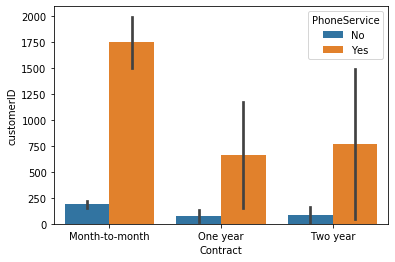

In [85]:
ax=sns.barplot(x='Contract',y='customerID',hue='PhoneService', data=phone_service)

### Month to month contract is the most used by phone service users

# 3.a)

# 3.b) paperless to keep customer retention

In [81]:
billingtypes= df.groupby(['PaperlessBilling','Churn'])['customerID'].count().reset_index()
billingtypes
#billingtypes[billingtypes['Churn']=="No"]

,PaperlessBilling,Churn,customerID
0,No,No,2403
1,No,Yes,469
2,Yes,No,2771
3,Yes,Yes,1400


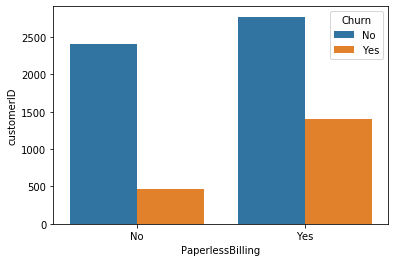

In [84]:
ax= sns.barplot(x='PaperlessBilling',y='customerID', hue='Churn', data=billingtypes)